# **20201119 DART WEB CRAWLING SESSION**

### 강의자: 다트 6기 곽유진


**목차**


---


* Python Library
* HTML
* Practice

**참고문헌**


---



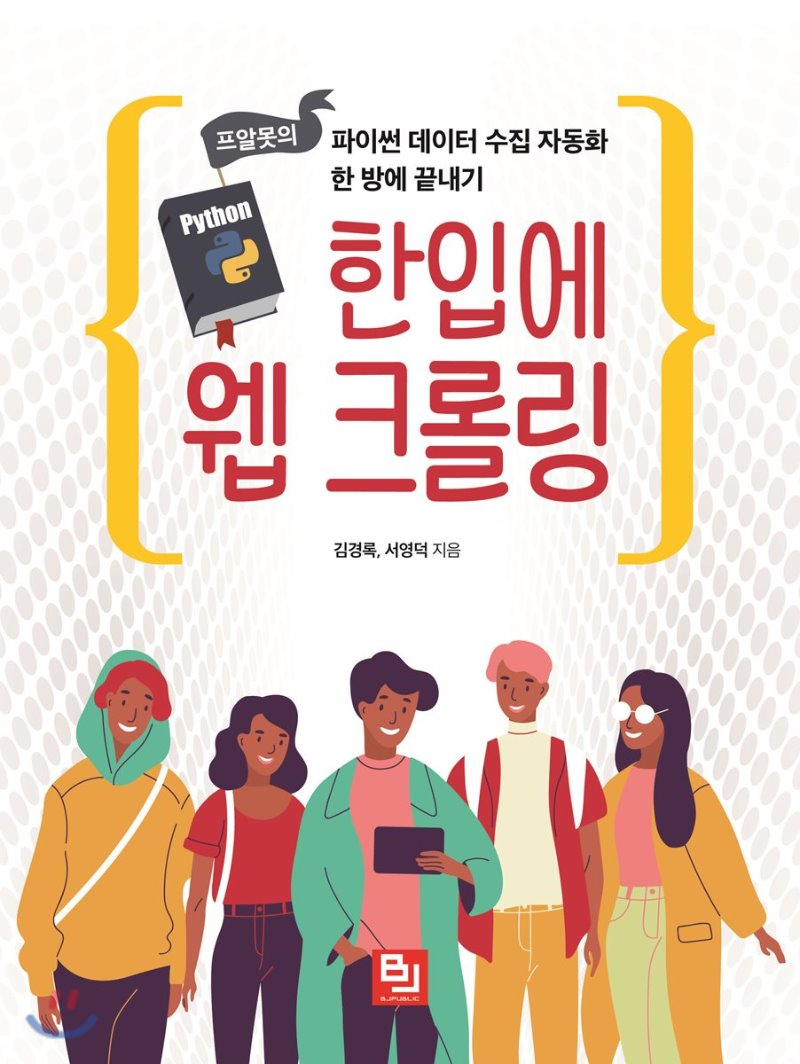

# 파이썬 라이브러리

## URLLIB 알아보기 - 네이버 첫 페이지 크롤링

**urllib** : 파이썬에서 인터넷에서 데이터를 받아 오는 기능들이 들어있는 패키지


> url을 넣고 실행하면 데이터를 텍스트 형태로 받아옴



b'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\
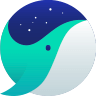
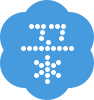

In [ ]:
# 네이버 첫 페이지 데이터 받아오기 
from urllib.request import urlopen

url = "https://www.naver.com/"
html = urlopen(url)

print(html.read())

## BeautifulSoup 알아보기 - 파싱

* 크롤링: 인터넷에서 데이터 불러오기
* 파싱: 불러온 데이터에서 원하는 데이터 추출

**find() 함수 예제**

In [ ]:
import bs4 

In [ ]:
# bs find() 예제 1
html_str1 = "<html><div>hello</div></html>"
bs_obj = bs4.BeautifulSoup(html_str1, "html.parser")

print(bs_obj)

<html><div>hello</div></html>


In [ ]:
print(bs_obj.find("div"))

<div>hello</div>


In [ ]:
# bs find() 예제 2 - ul
html_str2 = """
<html>
  <body>
    <ul>
      <li>hello</li>
      <li>bye</li>
      <li>welcome</li>
    </ul>
  </body>
</html>
"""
bs_obj = bs4.BeautifulSoup(html_str2, "html.parser")

ul = bs_obj.find("ul")
print(ul)

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>


In [ ]:
# bs find () 예제 - li
ul = bs_obj.find("ul")
li = ul.find("li")
print(li)

<li>hello</li>


In [ ]:
# bs find() 예제 - text만 출력하기
print(li.text)

hello


**findAll() 함수 예제**


> 조건에 해당하는 모든 요소 리스트 [] 형태로 *출력*



In [ ]:
# bs 예제 - findAll() 함수
html_str2 = """
<html>
  <body>
    <ul>
      <li>hello</li>
      <li>bye</li>
      <li>welcome</li>
    </ul>
  </body>
</html>
"""
bs_obj = bs4.BeautifulSoup(html_str2, "html.parser")

ul = bs_obj.find("ul")
lis = ul.findAll("li")
print(lis)

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]


In [ ]:
# bs 예제 - index로 접근하기
print(lis[2])

<li>welcome</li>


In [ ]:
print(lis[2].text)

welcome


# HTML



> * 태그(tag)
 * < >로 감싸져 있는 것
 * < ul >로 시작, < /ul >로 끝남
 * 자주 사용되는 예:< ul > < /ul >, < li > < /li>, < div > < /div >, < a > < /a > 등

> * 속성(property)
 * < ul class="greet" >
 * < a href = "https://www.naver.com/" >
 * 자주 사용되는 예: class, id, href





In [ ]:
# class 속성 이용해 데이터 가져오기 예제
html_str3 = """
<html>
  <body>
    <ul class = "greet">
      <li>hello</li>
      <li>bye</li>
      <li>welcome</li>
    </ul>
    <ul class = "happy">
      <li>happy</li>
      <li>:D</li>
    </ul>
  </body>
</html>
"""
bs_obj = bs4.BeautifulSoup(html_str3, "html.parser")

ul = bs_obj.find("ul")
print(ul)

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>


In [ ]:
ul = bs_obj.find("ul", {"class":"happy"}) # class 속성 필터링 조건에 추가
print(ul)

<ul class="happy">
<li>happy</li>
<li>:D</li>
</ul>


In [ ]:
# 속성값 가져오기 예제 - href
html_str4 = """
<html>
  <body>
    <ul class = "ko">
      <li>
        <a href = "https://www.naver.com/">네이버</a>
      </li>
      <li>
        <a href = "https://www.daum.net/">다음</a>
      </li>
    </ul>
    <ul class = "sns">
      <li>
        <a href = "https://www.google.com/">구글</a>
      </li>
      <li>
        <a href = "https://www.facebook.com/">.페이스북</a>
      </li>
    </ul>
  </body>
</html>
"""

bs_obj = bs4.BeautifulSoup(html_str4, "html.parser")
atag = bs_obj.find("a")
print(atag['href'])

https://www.naver.com/
